## Libraries

In [ ]:
import psycopg2 as pg2
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Connecting to Database

In [263]:
conn=pg2.connect(database='dvd rental', user='postgres', password= '0554640425kenan')

In [264]:
cur=conn.cursor()

In [265]:
cur.execute('SELECT * FROM gpa')

In [266]:
raw_data=cur.fetchall()

In [331]:
raw_data

[(Decimal('1714'), Decimal('2.4'), 'No'),
 (Decimal('1664'), Decimal('2.52'), 'No'),
 (Decimal('1760'), Decimal('2.54'), 'No'),
 (Decimal('1685'), Decimal('2.74'), 'No'),
 (Decimal('1693'), Decimal('2.83'), 'No'),
 (Decimal('1670'), Decimal('2.91'), 'No'),
 (Decimal('1764'), Decimal('3'), 'No'),
 (Decimal('1764'), Decimal('3'), 'No'),
 (Decimal('1792'), Decimal('3.01'), 'No'),
 (Decimal('1850'), Decimal('3.01'), 'No'),
 (Decimal('1735'), Decimal('3.02'), 'No'),
 (Decimal('1775'), Decimal('3.07'), 'No'),
 (Decimal('1735'), Decimal('3.08'), 'No'),
 (Decimal('1712'), Decimal('3.08'), 'No'),
 (Decimal('1773'), Decimal('3.12'), 'No'),
 (Decimal('1872'), Decimal('3.17'), 'Yes'),
 (Decimal('1755'), Decimal('3.17'), 'No'),
 (Decimal('1674'), Decimal('3.17'), 'Yes'),
 (Decimal('1842'), Decimal('3.17'), 'No'),
 (Decimal('1786'), Decimal('3.19'), 'Yes'),
 (Decimal('1761'), Decimal('3.19'), 'No'),
 (Decimal('1722'), Decimal('3.19'), 'No'),
 (Decimal('1663'), Decimal('3.2'), 'No'),
 (Decimal('1687'

## Creating Dataframe

In [267]:
import pandas as pd
import numpy as np

In [268]:
data=pd.DataFrame(raw_data)

In [269]:
data.columns=['GPA','SAT','Attendance']

In [270]:
d=data.copy()

In [271]:
d=d['Attendance'].map({'Yes': 1, 'No' : 0})

In [272]:
df=pd.DataFrame({'GPA': data['GPA'], 'SAT': data['SAT'], 'Attendance': d})

In [277]:
df.head(60)

,GPA,SAT,Attendance
0,1714,2.4,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
5,1670,2.91,0
6,1764,3,0
7,1764,3,0
8,1792,3.01,0
9,1850,3.01,0


## Regression

In [278]:
import statsmodels.api as sm

In [285]:
y = df['GPA']
x1 = df[['SAT','Attendance']]

In [310]:
x=sm.add_constant(x1)
result=sm.OLS(y.astype(float),x.astype(float)).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     29.51
Date:                Sat, 30 Jan 2021   Prob (F-statistic):           2.36e-10
Time:                        03:23:19   Log-Likelihood:                -486.26
No. Observations:                  84   AIC:                             978.5
Df Residuals:                      81   BIC:                             985.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        940.4941    124.043      7.582      0.000     693.687    1187.301
SAT          275.9845     38.649      7.141      0.000     199.085     352.884
Attendance   -30.8307     20.923     -1.473      0.144     -72.462      10.800
==============================================================================
Omnibus:                        0.374   Durbin-Watson:                   2.178
Prob(Omnibus):                  0.830   Jarque-Bera (JB):                0.518
Skew:                          -0.134   Prob(JB):                        0.772
Kurtosis:                       2.724   Cond. No.                         52.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

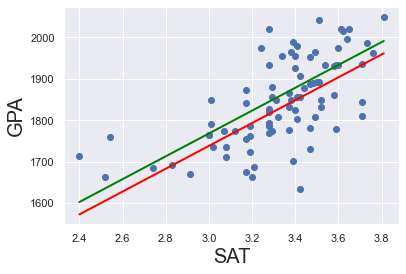

In [312]:
plt.scatter(data['SAT'],y)
yhat_no = 940 + 276 * data['SAT']
yhat_yes = 940 - 30  + 276 * data['SAT']
fig = plt.plot(data['SAT'],yhat_no, lw=2, c='green')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='red')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

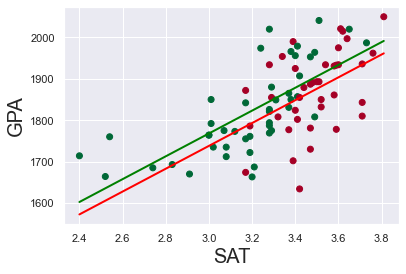

In [315]:
plt.scatter(df['SAT'],y,c=df['Attendance'],cmap='RdYlGn_r')
yhat_no = 940 + 276 * data['SAT']
yhat_yes = 940 - 30  + 276 * data['SAT']
fig = plt.plot(data['SAT'],yhat_no, lw=2, c='green')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='red')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()